In [113]:
# !pip install mysql-connector-python

In [114]:
# Importing the neccessary libraries

import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [115]:
# Connecting to the MySQL Server.

conn = mysql.connector.connect(
    host = 'localhost',
    port = 3306,
    user = 'root',
    password = 'password',
    database = 'project')

In [116]:
# Fetching the data of table from MySQL.

df_sm = pd.read_sql_query('select * from studmarks', conn)
df_sm

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,Pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [117]:
# checking the shape of the dataset.
df_sm.shape

# the data set contains 10 rows and 11 columns.

(10, 11)

In [118]:
# Let's check the data typeof each variable.
df_sm.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [119]:
# Let's check the columns
df_sm.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [120]:
# Statistical Summary

df_sm.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


From the above, we observe :
    1. The meadin of "Chemistry", "Biology", "Economics", "Civics" is more than the mean.
    2. There are ouliers present as there is a good difference between 75% and max. value of "Maths" and "Civics".
    3. The range is in between 2 to 96. And each variable varies in this range.

In [121]:
# Exploring the data variable.

df_sm["Gender"].unique()

array(['M', 'F'], dtype=object)

In [122]:
# Let's check the value counts of "Gender".

df_sm["Gender"].value_counts()

F    5
M    5
Name: Gender, dtype: int64

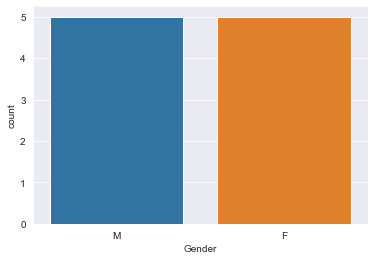

In [123]:
# Visualizing the counf of gender

sns.countplot(df_sm['Gender'])

So, from above it is clear that the count of males is equal to the count of females.

In [124]:
# Now, let's check the null values.

df_sm.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

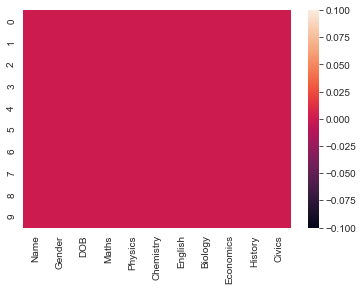

In [125]:
# visualization of null values using heatmap.

sns.heatmap(df_sm.isnull())

There are no null values present in the dataset.

In [126]:
# Let's check the correlation

df_sm.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


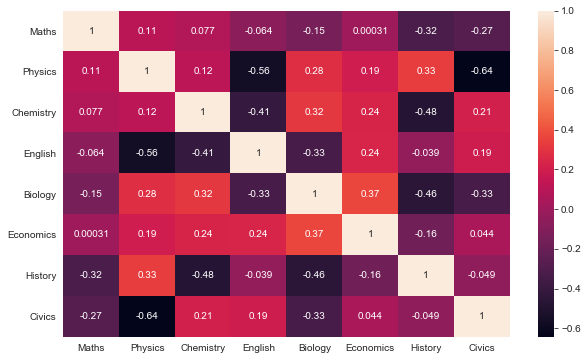

In [127]:
# Visualizing the correlation using heatmap.

plt.figure(figsize = (10,6))
sns.heatmap(df_sm.corr(), annot= True)

OBSERVATIONS :
    
    1. The correlation of the variables are more negatively correlated than the positive correlation.
    2. Physics ais negatively correlated with Physics and Civics.

In [128]:
# Checking the skewness 
df_sm.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

The skewness is in negative except for the 'Maths' but there is no need to treate the same as the skewness is below 0.55 for every feature.

In [129]:
# Univariate Analysis

df_sm.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

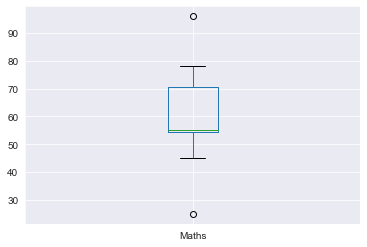

In [130]:
sns.set_style('darkgrid')
df_sm['Maths'].plot.box()

# Below boxplot shows that are a very few outlier present.

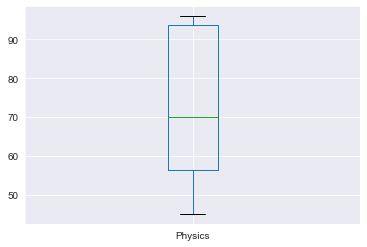

In [131]:
df_sm['Physics'].plot.box()

# No outliers are present in this feature.

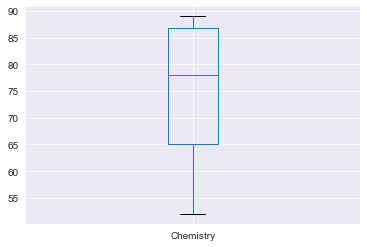

In [132]:
df_sm['Chemistry'].plot.box()

# No outliers are present in this feature.

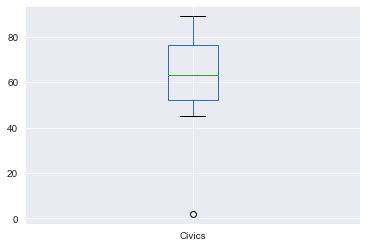

In [133]:
df_sm['Civics'].plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD746FF2C8>,
      dtype=object)

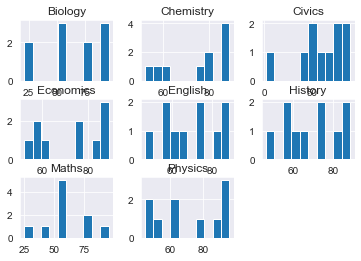

In [134]:

df_sm.hist()

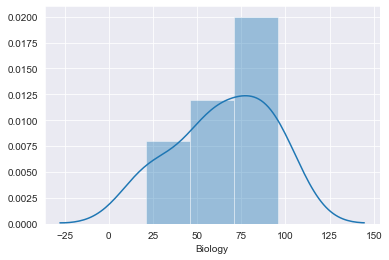

In [135]:
# Checking tthe skewness 

sns.distplot(df_sm['Biology'])

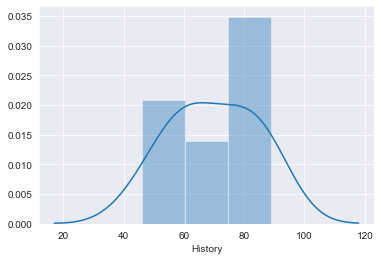

In [136]:
sns.distplot(df_sm['History'])

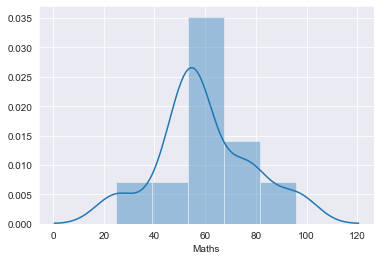

In [137]:
sns.distplot(df_sm['Maths'])

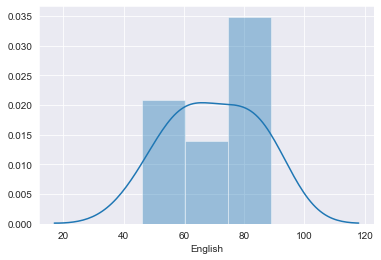

In [138]:
sns.distplot(df_sm['English'])

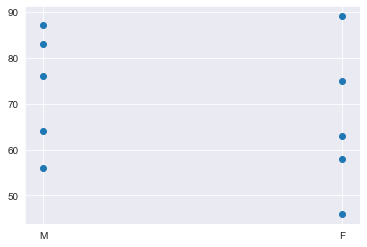

In [139]:
# Bivariate Analysis

plt.scatter(df_sm['Gender'],df_sm['English'])

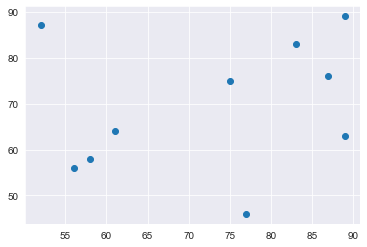

In [140]:
plt.scatter(df_sm['Economics'],df_sm['English'])

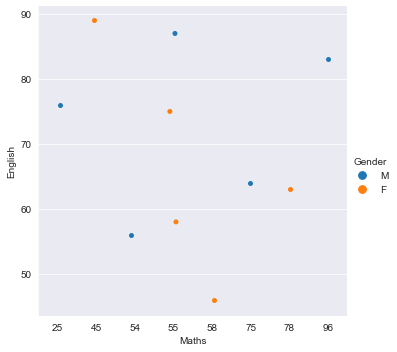

In [141]:
# setting up the category plot
a = sns.catplot(x="Maths",y="English",hue="Gender",data=df_sm)
plt.show()

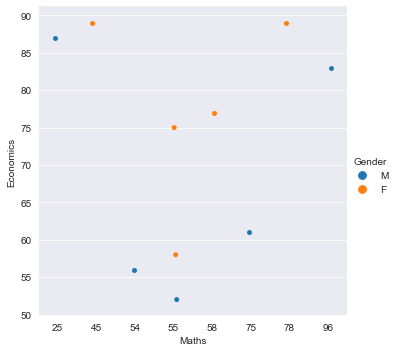

In [142]:
a = sns.catplot(x="Maths",y="Economics",hue="Gender",data=df_sm)
plt.show()

<Figure size 1440x864 with 0 Axes>

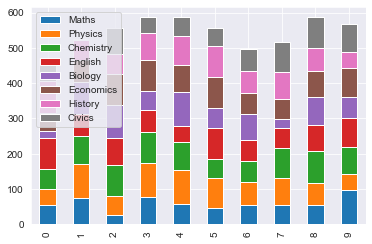

In [143]:
# Visualizing the whole data using barplot.

plt.figure(figsize=(20,12))
df_sm.plot.bar(stacked=True)

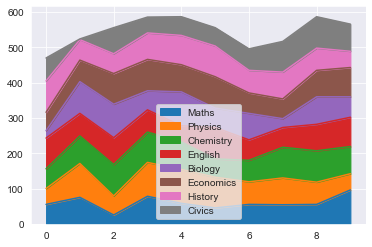

In [144]:
# Visualizing the whole data using area plot.

df_sm.plot.area()

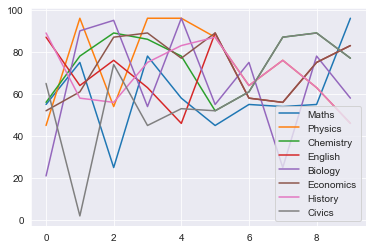

In [145]:
# Visualizing the whole data using line plot.

df_sm.plot.line()

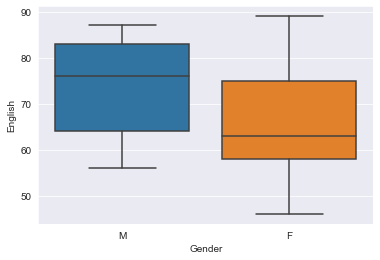

In [146]:
# Bivariate Analysis

sns.boxplot(x='Gender', y='English', data = df_sm)
plt.show()

This shows, that the mean value of male approximately equal to the 25% of the females in english subject.

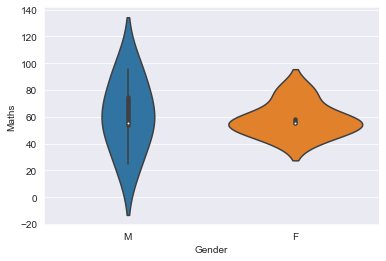

In [147]:
sns.violinplot(x='Gender', y='Maths', data = df_sm)
plt.show()

Majority of females have scored near 60 marks in maths subject as compared to males.

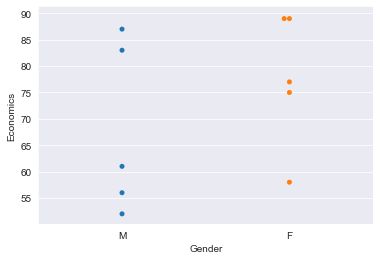

In [148]:
ax=sns.swarmplot(x="Gender",y="Economics", data = df_sm)
plt.show()

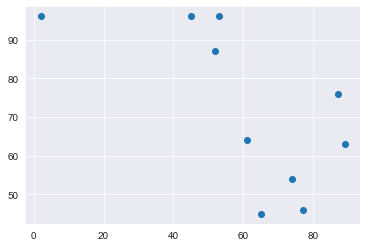

In [149]:
plt.scatter(df_sm['Civics'],df_sm['Physics'])
plt.show()

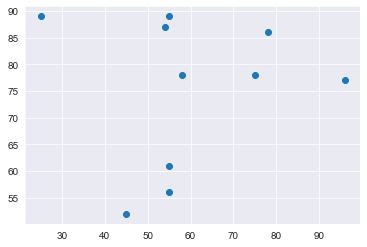

In [150]:
plt.scatter(df_sm['Maths'],df_sm['Chemistry'])
plt.show()

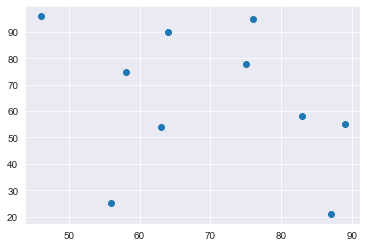

In [151]:
plt.scatter(df_sm['English'],df_sm['Biology'])
plt.show()

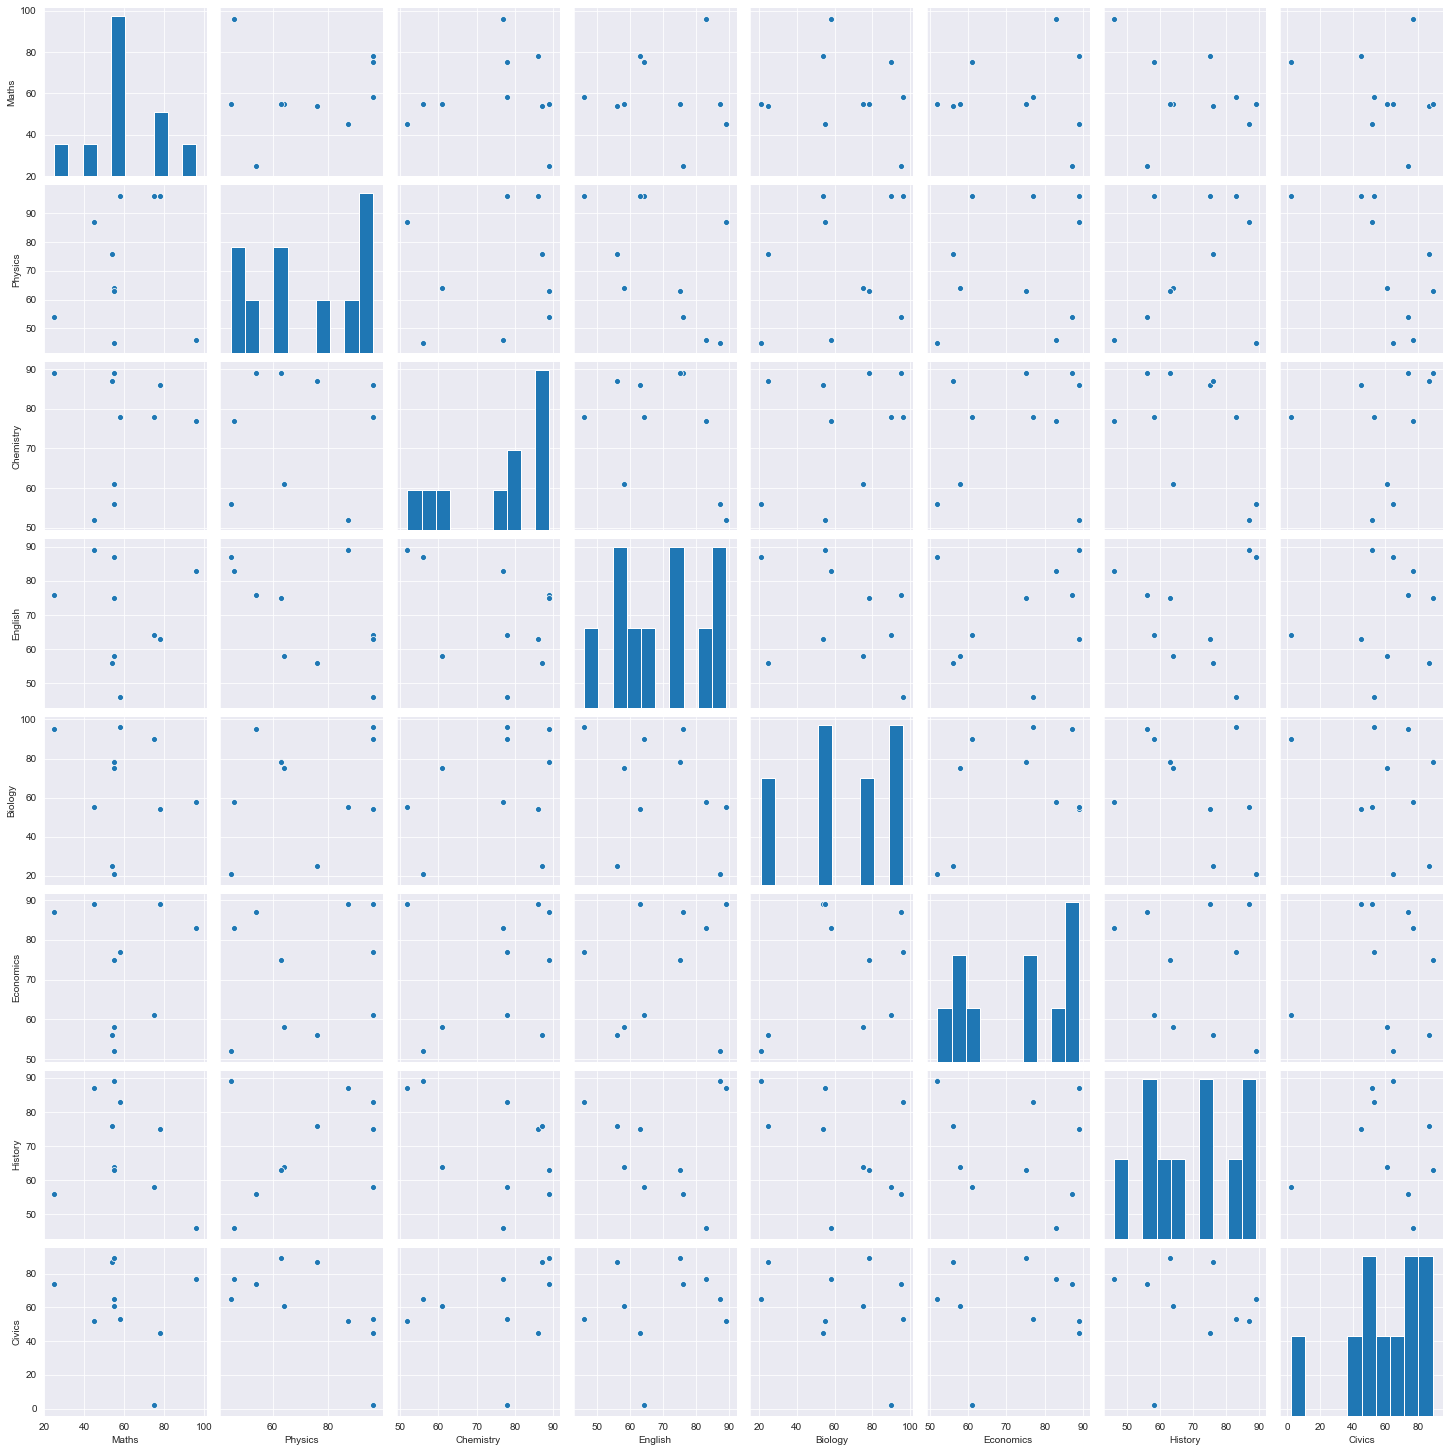

In [152]:
# Let's see the pairplot.
sns.pairplot(df_sm)

In [153]:
# Dropping the "Date" because it is not contributing in the dataset.

df_sm = df_sm.drop(['DOB'], axis=1)

In [154]:
# Replacing the target variable :
# 0 = Yes and 1 = No.
# Checking the value counts after replacing.

df_sm['Gender'] = df_sm.Gender.replace({"M":0, "F":1})
df_sm.Gender.value_counts()

1    5
0    5
Name: Gender, dtype: int64

In [155]:
# Dropping the "Name" column

df_sm = df_sm.drop(['Name'], axis=1)

In [156]:
df_sm.head()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,0,55,45,56,87,21,52,89,65
1,0,75,96,78,64,90,61,58,2
2,0,25,54,89,76,95,87,56,74
3,1,78,96,86,63,54,89,75,45
4,1,58,96,78,46,96,77,83,53


In [157]:
# Let's now check the outliers and clean the data.
z = np.abs(zscore(df_sm))
print(z.shape)
df_sm = df_sm.loc[(z<3).all(axis=1)]
print(df_sm.shape)

(10, 9)
(10, 9)


There are no outliers present.

In [158]:
# Saving the EDA model.

from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(df_sm, 'eda_studmarks.pkl')

['eda_studmarks.pkl']